In [1]:
pip install pandas numpy matplotlib scikit-learn seaborn joblib


In [5]:
import pandas as pd
import numpy as np
import io

# Raw CSV data for Mall_Customers
# This multi-line string contains the entire dataset.
csv_data = """CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3
10,Female,30,19,72
11,Male,67,19,14
12,Female,35,19,99
13,Female,58,20,15
14,Female,24,20,77
15,Male,37,20,13
16,Male,22,20,79
17,Female,35,21,35
18,Male,20,21,66
19,Male,52,23,29
20,Female,35,23,98
21,Male,35,24,35
22,Male,25,24,73
23,Male,46,25,5
24,Female,31,25,73
25,Male,29,28,82
26,Female,45,28,32
27,Male,35,28,61
28,Female,40,29,31
29,Female,38,29,40
30,Female,23,30,87
31,Male,60,30,4
32,Male,21,33,4
33,Male,53,33,4
34,Female,18,33,92
35,Female,49,33,14
36,Female,21,33,81
37,Female,42,34,17
38,Female,30,34,73
39,Female,36,37,26
40,Female,20,37,75
41,Female,65,38,35
42,Male,24,38,92
43,Male,48,39,36
44,Female,31,39,61
45,Female,24,39,65
46,Female,49,39,28
47,Female,50,40,55
48,Female,27,40,47
49,Female,29,40,42
50,Female,31,40,42
51,Female,49,42,52
52,Male,33,42,60
53,Female,31,43,54
54,Male,59,43,60
55,Female,50,43,45
56,Male,47,43,41
57,Female,51,44,50
58,Male,69,44,46
59,Female,27,46,51
60,Male,53,46,46
61,Female,70,46,56
62,Male,19,46,55
63,Female,67,47,52
64,Female,54,47,59
65,Male,63,48,51
66,Male,18,48,59
67,Female,43,48,50
68,Female,68,48,48
69,Male,19,48,59
70,Female,32,48,47
71,Male,70,49,55
72,Female,47,49,42
73,Female,60,50,49
74,Female,60,50,56
75,Male,59,54,47
76,Male,26,54,54
77,Female,45,54,53
78,Male,40,54,48
79,Female,23,54,52
80,Female,49,54,42
81,Male,57,54,51
82,Male,38,54,55
83,Male,67,54,41
84,Female,46,54,44
85,Male,21,54,57
86,Female,48,54,46
87,Female,55,57,58
88,Female,22,57,55
89,Male,34,58,60
90,Female,50,58,46
91,Female,68,59,55
92,Male,18,60,49
93,Female,48,60,49
94,Female,40,60,40
95,Male,32,60,42
96,Male,24,60,52
97,Female,47,60,47
98,Female,27,60,50
99,Male,48,61,42
100,Male,20,62,55
101,Female,23,62,41
102,Female,49,62,48
103,Male,67,62,59
104,Female,26,62,55
105,Male,49,62,56
106,Female,21,62,42
107,Female,66,63,50
108,Female,54,63,46
109,Male,68,63,43
110,Female,66,63,48
111,Male,65,63,52
112,Female,19,63,54
113,Female,38,64,42
114,Male,19,64,46
115,Female,18,65,48
116,Female,19,65,50
117,Male,63,65,43
118,Female,49,65,59
119,Female,51,67,43
120,Female,50,67,57
121,Male,27,67,56
122,Female,38,67,40
123,Female,40,69,58
124,Male,39,69,91
125,Female,23,70,29
126,Male,31,70,77
127,Female,43,71,35
128,Male,40,71,95
129,Female,59,71,11
130,Male,38,71,75
131,Female,47,71,9
132,Male,39,71,75
133,Female,25,72,34
134,Female,31,72,71
135,Male,20,73,5
136,Female,29,73,88
137,Female,44,73,7
138,Male,32,73,73
139,Female,19,74,10
140,Female,35,74,72
141,Female,57,75,5
142,Male,32,75,93
143,Female,28,76,40
144,Female,32,76,87
145,Male,25,77,12
146,Male,28,77,97
147,Female,48,77,36
148,Male,32,78,90
149,Female,34,78,22
150,Male,34,78,90
151,Female,43,78,17
152,Male,39,78,88
153,Female,44,78,20
154,Female,38,78,76
155,Male,47,78,16
156,Female,27,78,89
157,Male,37,78,1
158,Female,30,78,78
159,Male,34,78,1
160,Female,30,79,83
161,Male,56,79,35
162,Female,29,79,83
163,Male,19,81,5
164,Female,31,81,93
165,Male,50,85,26
166,Female,36,85,75
167,Male,42,86,20
168,Female,33,86,95
169,Male,36,87,27
170,Female,32,87,63
171,Male,40,87,13
172,Male,28,87,75
173,Male,36,87,10
174,Male,36,87,92
175,Female,52,88,13
176,Female,30,88,86
177,Male,58,88,15
178,Male,27,93,90
179,Female,59,93,14
180,Male,35,93,90
181,Female,37,97,32
182,Male,32,97,86
183,Female,46,98,15
184,Male,29,98,88
185,Female,41,99,39
186,Male,30,99,97
187,Female,54,101,24
188,Male,28,101,68
189,Female,41,103,17
190,Female,36,103,85
191,Female,34,103,23
192,Female,32,103,69
193,Male,38,110,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18
199,Male,30,137,83
200,Male,30,137,83
"""

# Read the string data into a pandas DataFrame
df = pd.read_csv(io.StringIO(csv_data))

# Select the features
X = df.iloc[:, [3, 4]].values

# --- Verification ---
print("DataFrame created successfully from raw data.")
print("\nFirst 5 rows:")
print(df.head())
print("\nSelected features (first 5 rows):")
print(X[:5])

DataFrame created successfully from raw data.

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Selected features (first 5 rows):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


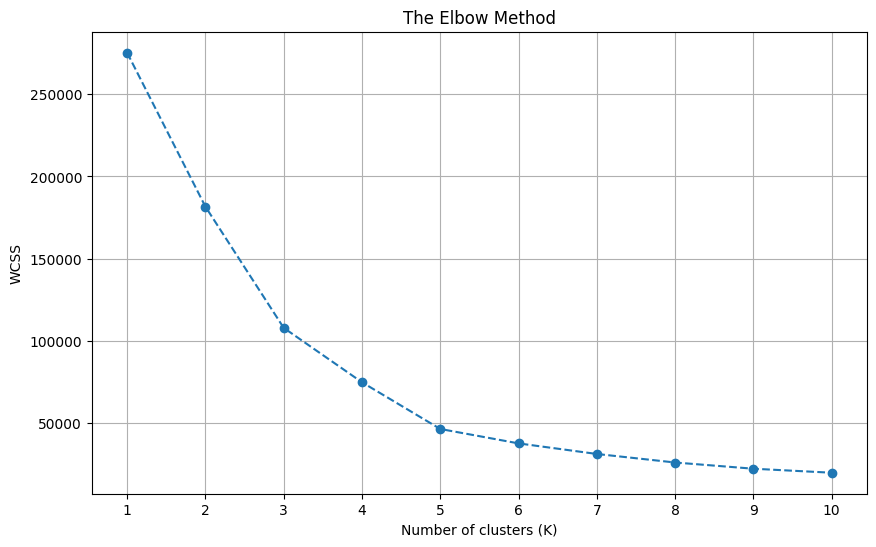

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We'll use our feature array 'X' from the previous step
wcss = []
for i in range(1, 11):
    # Initialize KMeans
    # 'k-means++' is an intelligent initialization method
    # 'random_state' ensures our results are reproducible
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)

    # Fit the model to our data X
    kmeans.fit(X)

    # Append the WCSS (stored in the 'inertia_' attribute) to our list
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

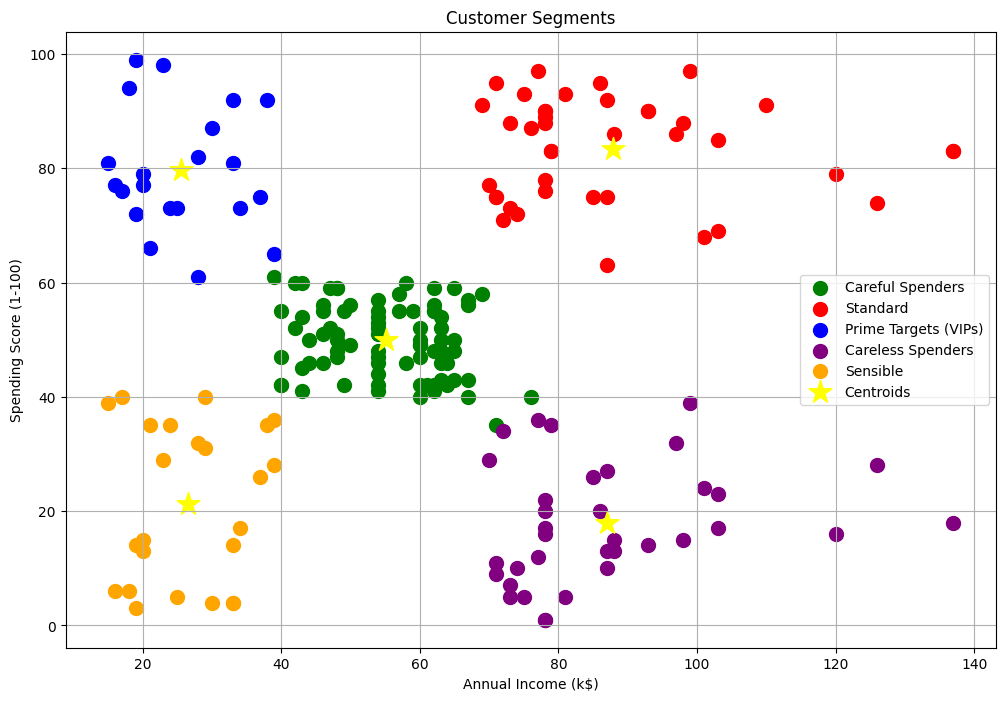

In [7]:
# Final K-Means model with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)

# Fit the model and predict the cluster for each data point
y_kmeans = kmeans.fit_predict(X)

# --- Visualization ---
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='green', label='Careful Spenders')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='red', label='Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='blue', label='Prime Targets (VIPs)')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Careless Spenders')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='orange', label='Sensible')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()